### 1021

K-평균은 거리 기반 알고리즘이므로 속성(피처)의 개수가 많아질수록 군집화 정확도가 떨어져 PCA로 차원 감소를 적용하여 이를 보완한다<br>
피처의 개수가 많다고 좋은 것은 아니다

In [2]:
import pandas as pd
import pydataset
import numpy as np

In [4]:
mpg = pydataset.data("mpg")
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
1    compact  
2    compact  
3    compact  
4    compact  
5    compact  
..       ...  
230  midsize  
231  midsize  
232  midsize  
233  midsize  
234  midsize  

[234 rows x 11 columns]

In [7]:
mpg.query("manufacturer in ['audi', 'ford', 'jeep', 'lincoln']")

manufacturer               model  displ  year  cyl       trans drv  cty  \
1           audi                  a4    1.8  1999    4    auto(l5)   f   18   
2           audi                  a4    1.8  1999    4  manual(m5)   f   21   
3           audi                  a4    2.0  2008    4  manual(m6)   f   20   
4           audi                  a4    2.0  2008    4    auto(av)   f   21   
5           audi                  a4    2.8  1999    6    auto(l5)   f   16   
6           audi                  a4    2.8  1999    6  manual(m5)   f   18   
7           audi                  a4    3.1  2008    6    auto(av)   f   18   
8           audi          a4 quattro    1.8  1999    4  manual(m5)   4   18   
9           audi          a4 quattro    1.8  1999    4    auto(l5)   4   16   
10          audi          a4 quattro    2.0  2008    4  manual(m6)   4   20   
11          audi          a4 quattro    2.0  2008    4    auto(s6)   4   19   
12          audi          a4 quattro    2.8  1999    6    auto(l5)   4   15   
13          audi          a4 quattro    2.8  1999    6  manual(m5)   4   17   
14          audi          a4 quattro    3.1  2008    6    auto(s6)   4   17   
15          audi          a4 quattro    3.1  2008    6  manual(m6)   4   15   
16          audi          a6 quattro    2.8  1999    6    auto(l5)   4   15   
17          audi          a6 quattro    3.1  2008    6    auto(s6)   4   17   
18          audi          a6 quattro    4.2  2008    8    auto(s6)   4   16   
75          ford      expedition 2wd    4.6  1999    8    auto(l4)   r   11   
76          ford      expedition 2wd    5.4  1999    8    auto(l4)   r   11   
77          ford      expedition 2wd    5.4  2008    8    auto(l6)   r   12   
78          ford        explorer 4wd    4.0  1999    6    auto(l5)   4   14   
79          ford        explorer 4wd    4.0  1999    6  manual(m5)   4   15   
80          ford        explorer 4wd    4.0  1999    6    auto(l5)   4   14   
81          ford        explorer 4wd    4.0  2008    6    auto(l5)   4   13   
82          ford        explorer 4wd    4.6  2008    8    auto(l6)   4   13   
83          ford        explorer 4wd    5.0  1999    8    auto(l4)   4   13   
84          ford     f150 pickup 4wd    4.2  1999    6    auto(l4)   4   14   
85          ford     f150 pickup 4wd    4.2  1999    6  manual(m5)   4   14   
86          ford     f150 pickup 4wd    4.6  1999    8  manual(m5)   4   13   
87          ford     f150 pickup 4wd    4.6  1999    8    auto(l4)   4   13   
88          ford     f150 pickup 4wd    4.6  2008    8    auto(l4)   4   13   
89          ford     f150 pickup 4wd    5.4  1999    8    auto(l4)   4   11   
90          ford     f150 pickup 4wd    5.4  2008    8    auto(l4)   4   13   
91          ford             mustang    3.8  1999    6  manual(m5)   r   18   
92          ford             mustang    3.8  1999    6    auto(l4)   r   18   
93          ford             mustang    4.0  2008    6  manual(m5)   r   17   
94          ford             mustang    4.0  2008    6    auto(l5)   r   16   
95          ford             mustang    4.6  1999    8    auto(l4)   r   15   
96          ford             mustang    4.6  1999    8  manual(m5)   r   15   
97          ford             mustang    4.6  2008    8  manual(m5)   r   15   
98          ford             mustang    4.6  2008    8    auto(l5)   r   15   
99          ford             mustang    5.4  2008    8  manual(m6)   r   14   
123         jeep  grand cherokee 4wd    3.0  2008    6    auto(l5)   4   17   
124         jeep  grand cherokee 4wd    3.7  2008    6    auto(l5)   4   15   
125         jeep  grand cherokee 4wd    4.0  1999    6    auto(l4)   4   15   
126         jeep  grand cherokee 4wd    4.7  1999    8    auto(l4)   4   14   
127         jeep  grand cherokee 4wd    4.7  2008    8    auto(l5)   4    9   
128         jeep  grand cherokee 4wd    4.7  2008    8    auto(l5)   4   14   
129         jeep  grand cherokee 4wd    5.7  2008    8

In [8]:
mpg[mpg['manufacturer'].isin(['audi', 'ford', 'jeep', 'lincoln'])]

manufacturer               model  displ  year  cyl       trans drv  cty  \
1           audi                  a4    1.8  1999    4    auto(l5)   f   18   
2           audi                  a4    1.8  1999    4  manual(m5)   f   21   
3           audi                  a4    2.0  2008    4  manual(m6)   f   20   
4           audi                  a4    2.0  2008    4    auto(av)   f   21   
5           audi                  a4    2.8  1999    6    auto(l5)   f   16   
6           audi                  a4    2.8  1999    6  manual(m5)   f   18   
7           audi                  a4    3.1  2008    6    auto(av)   f   18   
8           audi          a4 quattro    1.8  1999    4  manual(m5)   4   18   
9           audi          a4 quattro    1.8  1999    4    auto(l5)   4   16   
10          audi          a4 quattro    2.0  2008    4  manual(m6)   4   20   
11          audi          a4 quattro    2.0  2008    4    auto(s6)   4   19   
12          audi          a4 quattro    2.8  1999    6    auto(l5)   4   15   
13          audi          a4 quattro    2.8  1999    6  manual(m5)   4   17   
14          audi          a4 quattro    3.1  2008    6    auto(s6)   4   17   
15          audi          a4 quattro    3.1  2008    6  manual(m6)   4   15   
16          audi          a6 quattro    2.8  1999    6    auto(l5)   4   15   
17          audi          a6 quattro    3.1  2008    6    auto(s6)   4   17   
18          audi          a6 quattro    4.2  2008    8    auto(s6)   4   16   
75          ford      expedition 2wd    4.6  1999    8    auto(l4)   r   11   
76          ford      expedition 2wd    5.4  1999    8    auto(l4)   r   11   
77          ford      expedition 2wd    5.4  2008    8    auto(l6)   r   12   
78          ford        explorer 4wd    4.0  1999    6    auto(l5)   4   14   
79          ford        explorer 4wd    4.0  1999    6  manual(m5)   4   15   
80          ford        explorer 4wd    4.0  1999    6    auto(l5)   4   14   
81          ford        explorer 4wd    4.0  2008    6    auto(l5)   4   13   
82          ford        explorer 4wd    4.6  2008    8    auto(l6)   4   13   
83          ford        explorer 4wd    5.0  1999    8    auto(l4)   4   13   
84          ford     f150 pickup 4wd    4.2  1999    6    auto(l4)   4   14   
85          ford     f150 pickup 4wd    4.2  1999    6  manual(m5)   4   14   
86          ford     f150 pickup 4wd    4.6  1999    8  manual(m5)   4   13   
87          ford     f150 pickup 4wd    4.6  1999    8    auto(l4)   4   13   
88          ford     f150 pickup 4wd    4.6  2008    8    auto(l4)   4   13   
89          ford     f150 pickup 4wd    5.4  1999    8    auto(l4)   4   11   
90          ford     f150 pickup 4wd    5.4  2008    8    auto(l4)   4   13   
91          ford             mustang    3.8  1999    6  manual(m5)   r   18   
92          ford             mustang    3.8  1999    6    auto(l4)   r   18   
93          ford             mustang    4.0  2008    6  manual(m5)   r   17   
94          ford             mustang    4.0  2008    6    auto(l5)   r   16   
95          ford             mustang    4.6  1999    8    auto(l4)   r   15   
96          ford             mustang    4.6  1999    8  manual(m5)   r   15   
97          ford             mustang    4.6  2008    8  manual(m5)   r   15   
98          ford             mustang    4.6  2008    8    auto(l5)   r   15   
99          ford             mustang    5.4  2008    8  manual(m6)   r   14   
123         jeep  grand cherokee 4wd    3.0  2008    6    auto(l5)   4   17   
124         jeep  grand cherokee 4wd    3.7  2008    6    auto(l5)   4   15   
125         jeep  grand cherokee 4wd    4.0  1999    6    auto(l4)   4   15   
126         jeep  grand cherokee 4wd    4.7  1999    8    auto(l4)   4   14   
127         jeep  grand cherokee 4wd    4.7  2008    8    auto(l5)   4    9   
128         jeep  grand cherokee 4wd    4.7  2008    8    auto(l5)   4   14   
129         jeep  grand cherokee 4wd    5.7  2008    8

In [15]:
#제조사 별 drv에 따른 cty의 최대값을 그래프로
import seaborn as sns

manuf4 = mpg[mpg['manufacturer'].isin(['audi', 'ford', 'jeep', 'lincoln'])]
manuf4.groupby(['manufacturer', 'drv'])[['cty']].agg(cty_max = ('cty', 'max'))
#manuf4.groupby(['manufacturer', 'drv'], as_index = False)[['cty']].agg(cty_max = ('cty', 'max'))

cty_max
manufacturer drv         
audi         4         20
             f         21
ford         4         15
             r         18
jeep         4         17
lincoln      r         12

In [23]:
manuf4_cty_mean = manuf4.groupby(['manufacturer', 'drv'])[['cty']].agg(cty_max = ('cty', 'max'))
manuf4_cty_mean = manuf4_cty_mean.reset_index()
manuf4_cty_mean

manufacturer drv  cty_max
0         audi   4       20
1         audi   f       21
2         ford   4       15
3         ford   r       18
4         jeep   4       17
5      lincoln   r       12

<AxesSubplot:xlabel='manufacturer', ylabel='cty_max'>

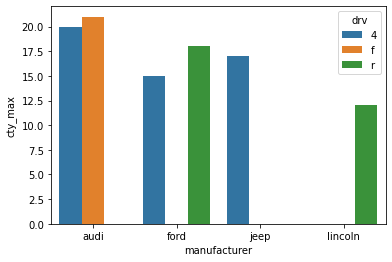

In [22]:
sns.barplot(data = manuf4_cty_mean, x = 'manufacturer', y = 'cty_max', hue = 'drv')

### 1024

## 8. 텍스트 분석
참고 사이트 https://wikidocs.net/book/2155

### (1) 텍스트 분석 이해

### (2) 텍스트 전처리

In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk

### * 문장 토큰화

In [26]:
from nltk import sent_tokenize

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [29]:
text_sample =  'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes' 

In [32]:
sent_tokenize(text = text_sample)

['The Matrix is everywhere its all around us, here even in this room.',
 'You can see it out your window or on your television.',
 'You feel it when you go to work, or go to church or pay your taxes']

In [34]:
sentences = sent_tokenize(text = text_sample)
len(sentences)

3

### * 단어 토큰화

In [35]:
from nltk import word_tokenize

In [38]:
words = word_tokenize(text_sample)
words

['The',
 'Matrix',
 'is',
 'everywhere',
 'its',
 'all',
 'around',
 'us',
 ',',
 'here',
 'even',
 'in',
 'this',
 'room',
 '.',
 'You',
 'can',
 'see',
 'it',
 'out',
 'your',
 'window',
 'or',
 'on',
 'your',
 'television',
 '.',
 'You',
 'feel',
 'it',
 'when',
 'you',
 'go',
 'to',
 'work',
 ',',
 'or',
 'go',
 'to',
 'church',
 'or',
 'pay',
 'your',
 'taxes']

In [39]:
for sentence in sentences:
    print(word_tokenize(sentence))

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']
['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.']
['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes']


In [41]:
li = []
for sentence in sentences:
    li.append(word_tokenize(sentence))
li

[['The',
  'Matrix',
  'is',
  'everywhere',
  'its',
  'all',
  'around',
  'us',
  ',',
  'here',
  'even',
  'in',
  'this',
  'room',
  '.'],
 ['You',
  'can',
  'see',
  'it',
  'out',
  'your',
  'window',
  'or',
  'on',
  'your',
  'television',
  '.'],
 ['You',
  'feel',
  'it',
  'when',
  'you',
  'go',
  'to',
  'work',
  ',',
  'or',
  'go',
  'to',
  'church',
  'or',
  'pay',
  'your',
  'taxes']]

In [43]:
[word_tokenize(sentence) for sentence in sentences]

[['The',
  'Matrix',
  'is',
  'everywhere',
  'its',
  'all',
  'around',
  'us',
  ',',
  'here',
  'even',
  'in',
  'this',
  'room',
  '.'],
 ['You',
  'can',
  'see',
  'it',
  'out',
  'your',
  'window',
  'or',
  'on',
  'your',
  'television',
  '.'],
 ['You',
  'feel',
  'it',
  'when',
  'you',
  'go',
  'to',
  'work',
  ',',
  'or',
  'go',
  'to',
  'church',
  'or',
  'pay',
  'your',
  'taxes']]

*n-gram

1-gram : uni-gram<br>
2-gram : bi-gram<br>
3-gram : tir-gram

*corpus<br>
말뭉치, 분석하고자 하는 하나의 기본단위<br>
시, 시집, 여러 시인들의 시집들, 도서관 내의 모든 책 등이 모두 다 corpus 에 해당된다

#### 스탑 워드 제거
stop words : a, the, .. 와 같은 분석에 문장 분석에 불필요한(제거해야하는) 단어들

### * Stemming 과 Lemmatization
stem : 어간, stemming : 어간 추출 (ex. plays --> play 를 추출)<br>
lemmatizaion : 표제어(품사) 추출 (ex. is, was --> be 로 추출)

### * stemming

In [44]:
from nltk.stem import LancasterStemmer

In [46]:
stemmer = LancasterStemmer()
stemmer.stem('plays')

'play'

In [48]:
stemmer.stem('working')

'work'

In [50]:
stemmer.stem('is')
stemmer.stem('was')

'was'

### * lemmatization

In [53]:
from nltk.stem import WordNetLemmatizer

In [56]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

In [57]:
lemma = WordNetLemmatizer()
lemma.lemmatize('plays', 'v')

'play'

In [59]:
print(lemma.lemmatize('is', 'v'))
lemma.lemmatize('was', 'v')

be


'be'

### (3) BOW (Bag of Words)

### * 희소행렬 - COO 형식

In [68]:
a = np.zeros((5,5))
a[4, :] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

In [69]:
from scipy import sparse

In [71]:
#희소행렬 만들기
data= np.array([3, 1, 2])
row = np.array([0, 0, 1])
col = np.array([0, 2, 1])
#3은 [0, 0], 1은 [0, 2], 2는 [1, 1] 에 위치한다

sarpse_coo = sparse.coo_matrix((data, (row, col)))
sarpse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [72]:
sparse.coo_matrix((data, (row, col)), shape=(4, 4)).toarray()

array([[3, 0, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

### * 희소행렬 - CSR 형식

In [73]:
dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

In [74]:
data= np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])
row = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

sparse.coo_matrix((data, (row, col))).toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

In [79]:
row_index = np.array([0, 2, 7, 9, 10, 12, 13])
sparse.csr_matrix((data, col, row_index)).toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

### (4) 텍스트 분류 실습 - 20 뉴스그룹 분류

#### ① 텍스트 전처리

In [80]:
from sklearn.datasets import fetch_20newsgroups

In [118]:
news = fetch_20newsgroups(subset='all', random_state=1560)
news

{'data': ["From: mporter@cis.ohio-state.edu (matthew dale porter)\nSubject: Re: Reasonable Civie Arms Limits\nOrganization: The Ohio State University Dept. of Computer and Info. Science\nLines: 42\nNNTP-Posting-Host: python.cis.ohio-state.edu\n\nIn article <1993Apr19.223925.2342@gnv.ifas.ufl.edu> jrm@gnv.ifas.ufl.edu writes:\n>A poster claims he 'always asks [anti-gunners] what they think would\n>be reasonable personal firepower restrictions'. OK then ...\n>\n>Caliber : Not greater than 32\n>Muzzle  : Not greater than 300 ft/lbs with any combo of bullet wt/vel\n>Action  : Single shot rifles and single action revolvers \n>          Revolvers bearing no more than six rounds and incorporating\n>          an 'anti-fanning' mechanism to discourage Roy Rogers wannabes.\n>Bullets : Any non-explosive variety, HPs just fine.\n>\n>Now - these specs leave the 32 H&R magnum as about the most powerful\n>allowable civie cartridge for handgun or rifle use. It would be\n>reasonably effective against h

In [119]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [120]:
pd.Series(news['target']).value_counts().sort_index()

0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64

In [121]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [122]:
news['data'][0]

"From: mporter@cis.ohio-state.edu (matthew dale porter)\nSubject: Re: Reasonable Civie Arms Limits\nOrganization: The Ohio State University Dept. of Computer and Info. Science\nLines: 42\nNNTP-Posting-Host: python.cis.ohio-state.edu\n\nIn article <1993Apr19.223925.2342@gnv.ifas.ufl.edu> jrm@gnv.ifas.ufl.edu writes:\n>A poster claims he 'always asks [anti-gunners] what they think would\n>be reasonable personal firepower restrictions'. OK then ...\n>\n>Caliber : Not greater than 32\n>Muzzle  : Not greater than 300 ft/lbs with any combo of bullet wt/vel\n>Action  : Single shot rifles and single action revolvers \n>          Revolvers bearing no more than six rounds and incorporating\n>          an 'anti-fanning' mechanism to discourage Roy Rogers wannabes.\n>Bullets : Any non-explosive variety, HPs just fine.\n>\n>Now - these specs leave the 32 H&R magnum as about the most powerful\n>allowable civie cartridge for handgun or rifle use. It would be\n>reasonably effective against home intrud

In [123]:
fetch_20newsgroups(subset='train', remove=['header', 'footer', 'quotes'],
                   random_state=156)

{'data': ["From: dlc@umcc.umcc.umich.edu (David Claytor)\nSubject: Re: When is Apple going to ship CD300i's?\nOrganization: UMCC, Ann Arbor, MI\nLines: 43\nNNTP-Posting-Host: umcc.umcc.umich.edu\n\n\n\nWhat I did NOT get with my drive (CD300i) is the System Install CD you\nlisted as #1.  Any ideas about how I can get one?  I bought my IIvx 8/120\nfrom Direct Express in Chicago (no complaints at all -- good price & good\nservice).\n\nBTW, I've heard that the System Install CD can be used to boot the mac;\nhowever, my drive will NOT accept a CD caddy is the machine is off.  How can\nyou boot with it then?\n\n--Dave\n\n-- \n                           dlc@umcc.ais.org  313.485.3394\n\n",
  'From: cpage@two-step.seas.upenn.edu (Carter C. Page)\nSubject: Re: Prayer in Jesus\' Name\nOrganization: University of Pennsylvania\nLines: 46\n\n\n\t"And in that day you will ask Me no question.  Truly, truly, I say to \n\tyou, if you shall ask the Father for anything, He will give it to you \n\tin my 

In [124]:
train_news = fetch_20newsgroups(subset='train', remove=['header', 'footer', 'quotes'],
                                random_state=156)

X_train = train_news.data
y_train = train_news.target

In [125]:
test_news = fetch_20newsgroups(subset='test', remove=['header', 'footer', 'quotes'],
                                random_state=156)

X_test = test_news.data
y_test = test_news.target

### ② 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

In [126]:
len(y_train)

11314

In [127]:
len(y_test)

7532

#### CountVectorizer

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
#Count Vectorization으로 피처 벡터화 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

#학습 데이터(train)로 fit()된 CountVectorizer를 이용해 테스트 데이터에 피처 벡처화 변환 수행
X_test_cnt_vect = cnt_vect.transform(X_test)

In [130]:
X_train_cnt_vect.shape

(11314, 120756)

In [131]:
X_test_cnt_vect

<7532x120756 sparse matrix of type '<class 'numpy.int64'>'
	with 878989 stored elements in Compressed Sparse Row format>

In [132]:
#로지스틱 회귀 적용 -> 뉴스그룹에 대한 분류 예측
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [133]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_cnt_vect, y_train)

LogisticRegression(solver='liblinear')

In [144]:
preds = lr_clf.predict(X_test_cnt_vect)

In [145]:
accuracy_score(y_test, preds)

ValueError: Found input variables with inconsistent numbers of samples: [753, 7532]

#### TF-IDF

In [136]:
#tf-idf 적용
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
len(y_train)

11314

tf-idf 적용하기 전 데이터 크기 줄이기

In [138]:
#tf-idf 적용하기 전 데이터 크기 줄이기
train_index = np.random.randint(0, len(y_train), size = (int(len(y_train) * 0.1)))

y_train = y_train[train_index]

X_train = np.array(X_train)
X_train = X_train[train_index]

In [139]:
len(y_train)

1131

In [140]:
len(y_test)

7532

In [141]:
test_index = np.random.randint(0, len(y_test), size = (int(len(y_test) * 0.1)))

y_test = y_test[test_index]

X_test = np.array(X_test)
X_test = X_test[test_index]

In [142]:
len(y_test)

753

In [107]:
#TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트로 변환
tf_vect = TfidfVectorizer()

tf_vect.fit(X_train)

X_train_tf_vect = tf_vect.transform(X_train)
X_test_tf_vect = tf_vect.transform(X_test)

In [100]:
#로지스틱 회귀를 이용해 학습/예측/평가
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_tf_vect, y_train)
preds = lr_clf.predict(X_test_tf_vect)

accuracy_score(y_test, preds)

LogisticRegression(solver='liblinear')

In [107]:
#stop words 필터링을 추가하고 ngram을 기본 (1,1)에서 (1,2)로 변경
tf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)

tf_vect.fit(X_train)

X_train_tf_vect = tf_vect.transform(X_train)
X_test_tf_vect = tf_vect.transform(X_test)

In [100]:
#로지스틱 회귀를 이용해 학습/예측/평가
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_tf_vect, y_train)
preds = lr_clf.predict(X_test_tf_vect)

accuracy_score(y_test, preds)

LogisticRegression(solver='liblinear')

### ③ 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

In [143]:
from sklearn.pipeline import Pipeline

In [147]:
pipeline = Pipeline([('tf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
                    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

In [150]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tf_vect',
                 TfidfVectorizer(max_df=300, ngram_range=(1, 2),
                                 stop_words='english')),
                ('lr_clf', LogisticRegression(C=10, solver='liblinear'))])

In [151]:
preds = pipeline.predict(X_test)
accuracy_score(y_test, preds)

0.6201859229747676

#### Pipeline + GridSearchCV

In [ ]:
pipeline = Pipeline([('tf_vect', TfidfVectorizer(stop_words='english')),
                    ('lr_clf', LogisticRegression())])

#pipeline에 기술된 각각의 객체 변수에 언더바(_) 2개를 연달아 붙여
#GridSearchCV에 사용될 파라미터/하이퍼 파라미터 이름과 값을 설정
params = {'tf_vect__ngram_range': [(1,1), (1,2), (1,3)],
         'tf_vect__max_df': [100, 300, 700], 'lr_clf_C': [1, 5, 10]}

In [ ]:
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
accuracy_score(y_test, pred)

### (5) 감성 분석 (Sentiment Analysis)

### ① 지도학습 기반 감성 분석 실습 - IMDB 영화평
https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [152]:
review = pd.read_csv("labeledTrainData.tsv", header=0, sep="\t", quoting=3)
review[:5]

id  sentiment  \
0  "5814_8"          1   
1  "2381_9"          1   
2  "7759_3"          0   
3  "3630_4"          0   
4  "9495_8"          1   

                                                                                      review  
0  "With all this stuff going down at the moment with MJ i've started listening to his mu...  
1  "\"The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that o...  
2  "The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carra...  
3  "It must be assumed that those who praised this film (\"the greatest filmed opera ever...  
4  "Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credi...

#### 정규 표현식 사용

In [153]:
import re

In [156]:
#<br> html 태그는 공백으로 변환
review['review'] = review['review'].str.replace("<br />", " ")
review['review']

0        "With all this stuff going down at the moment with MJ i've started listening to his mu...
1        "\"The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that o...
2        "The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carra...
3        "It must be assumed that those who praised this film (\"the greatest filmed opera ever...
4        "Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credi...
                                                   ...                                            
24995    "It seems like more consideration has gone into the IMDb reviews of this film than wen...
24996    "I don't believe they made this film. Completely unnecessary. The first film was okay....
24997    "Guy is a loser. Can't get girls, needs to build up, is picked on by stronger more suc...
24998    "This 30 minute documentary Buñuel made in the early 1930's about one of Spain's poore...
24999    "

In [159]:
#영어 문자열이 아닌 문자는 모두 공백으로 변환
#lambda 함수에서의 x : series 형태인 review['review'] 를 구성하는 '칼럼'을 의미
#review['review'] = review.apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
#DataFrame에 apply lambda x 는 DF를 구성하는 셀 하나하나를 의미
review['review'] = review['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [161]:
#학습과 데이터 세트 분리
from sklearn.model_selection import train_test_split

class_df = review['sentiment']
feature_df = review.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df,
                                                    test_size=0.3, random_state=156)

In [162]:
X_train.shape

(17500,)

In [164]:
X_test.shape

(7500,)

In [165]:
#학습/예측/평가
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
pipeline = Pipeline([('tf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
                     ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('accuracy:', accuracy_score(y_test, pred))
print('roc-auc:', roc_auc_score(y_test, pred_probs))

In [ ]:
pipeline = Pipeline([('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
                     ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('accuracy:', accuracy_score(y_test, pred))
print('roc-auc:', roc_auc_score(y_test, pred_probs))

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk

In [4]:
from nltk import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes'

sent_tokenize(text = text_sample)

['The Matrix is everywhere its all around us, here even in this room.',
 'You can see it out your window or on your television.',
 'You feel it when you go to work, or go to church or pay your taxes']

In [6]:
sentences = sent_tokenize(text = text_sample)
len(sentences)

3

In [7]:
from nltk import word_tokenize

In [9]:
words = word_tokenize(text_sample)
words

['The',
 'Matrix',
 'is',
 'everywhere',
 'its',
 'all',
 'around',
 'us',
 ',',
 'here',
 'even',
 'in',
 'this',
 'room',
 '.',
 'You',
 'can',
 'see',
 'it',
 'out',
 'your',
 'window',
 'or',
 'on',
 'your',
 'television',
 '.',
 'You',
 'feel',
 'it',
 'when',
 'you',
 'go',
 'to',
 'work',
 ',',
 'or',
 'go',
 'to',
 'church',
 'or',
 'pay',
 'your',
 'taxes']

In [10]:
for sentence in sentences:
    print(word_tokenize(sentence))

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']
['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.']
['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes']


In [11]:
li=[]
for sentence in sentences:
    li.append(word_tokenize(sentence))
    
li

[['The',
  'Matrix',
  'is',
  'everywhere',
  'its',
  'all',
  'around',
  'us',
  ',',
  'here',
  'even',
  'in',
  'this',
  'room',
  '.'],
 ['You',
  'can',
  'see',
  'it',
  'out',
  'your',
  'window',
  'or',
  'on',
  'your',
  'television',
  '.'],
 ['You',
  'feel',
  'it',
  'when',
  'you',
  'go',
  'to',
  'work',
  ',',
  'or',
  'go',
  'to',
  'church',
  'or',
  'pay',
  'your',
  'taxes']]

In [12]:
[word_tokenize(sentence) for sentence in sentences]

[['The',
  'Matrix',
  'is',
  'everywhere',
  'its',
  'all',
  'around',
  'us',
  ',',
  'here',
  'even',
  'in',
  'this',
  'room',
  '.'],
 ['You',
  'can',
  'see',
  'it',
  'out',
  'your',
  'window',
  'or',
  'on',
  'your',
  'television',
  '.'],
 ['You',
  'feel',
  'it',
  'when',
  'you',
  'go',
  'to',
  'work',
  ',',
  'or',
  'go',
  'to',
  'church',
  'or',
  'pay',
  'your',
  'taxes']]

In [13]:
from nltk.stem import LancasterStemmer

In [14]:
stemmer = LancasterStemmer()
stemmer.stem('played')

'play'

In [15]:
stemmer.stem('working')

'work'

In [16]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
lemma = WordNetLemmatizer()
lemma.lemmatize('plays', 'v')

'play'

In [18]:
print(lemma.lemmatize('is', 'v'))
lemma.lemmatize('was', 'v')

be


'be'

In [20]:
a = np.zeros((5,5))
a[4, :] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

In [21]:
from scipy import sparse

In [22]:
dense = np.array([[3,0,1], [0,2,0]])
dense

array([[3, 0, 1],
       [0, 2, 0]])

In [23]:
data= np.array([3, 2, 1])
row = np.array([0, 1, 0])
col = np.array([0, 1, 2])

In [25]:
sparse_coo = sparse.coo_matrix((data, (row, col)))
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [26]:
sparse.coo_matrix((data, (row, col)), shape=(4,4)).toarray()

array([[3, 0, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [27]:
dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
dense2

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

In [28]:
data= np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])
row = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

sparse.coo_matrix((data, (row, col))).toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

In [29]:
row_index = np.array([0, 2, 7, 9, 10, 12, 13])

sparse.csr_matrix((data, col, row_index)).toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

In [30]:
from sklearn.datasets import fetch_20newsgroups

In [31]:
news = fetch_20newsgroups(subset='all', random_state=156)
news

{'data': ['From: egreen@east.sun.com (Ed Green - Pixel Cruncher)\nSubject: Re: Observation re: helmets\nOrganization: Sun Microsystems, RTP, NC\nLines: 21\nDistribution: world\nReply-To: egreen@east.sun.com\nNNTP-Posting-Host: laser.east.sun.com\n\nIn article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:\n> \n> The question for the day is re: passenger helmets, if you don\'t know for \n>certain who\'s gonna ride with you (like say you meet them at a .... church \n>meeting, yeah, that\'s the ticket)... What are some guidelines? Should I just \n>pick up another shoei in my size to have a backup helmet (XL), or should I \n>maybe get an inexpensive one of a smaller size to accomodate my likely \n>passenger? \n\nIf your primary concern is protecting the passenger in the event of a\ncrash, have him or her fitted for a helmet that is their size.  If your\nprimary concern is complying with stupid helmet laws, carry a real big\nspare (you can put a big

In [32]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [34]:
news['target']

array([ 8,  8, 12, ...,  7,  3,  9])

In [35]:
pd.Series(news['target']).value_counts().sort_index()

0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64

In [36]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [37]:
news['data'][0]

'From: egreen@east.sun.com (Ed Green - Pixel Cruncher)\nSubject: Re: Observation re: helmets\nOrganization: Sun Microsystems, RTP, NC\nLines: 21\nDistribution: world\nReply-To: egreen@east.sun.com\nNNTP-Posting-Host: laser.east.sun.com\n\nIn article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:\n> \n> The question for the day is re: passenger helmets, if you don\'t know for \n>certain who\'s gonna ride with you (like say you meet them at a .... church \n>meeting, yeah, that\'s the ticket)... What are some guidelines? Should I just \n>pick up another shoei in my size to have a backup helmet (XL), or should I \n>maybe get an inexpensive one of a smaller size to accomodate my likely \n>passenger? \n\nIf your primary concern is protecting the passenger in the event of a\ncrash, have him or her fitted for a helmet that is their size.  If your\nprimary concern is complying with stupid helmet laws, carry a real big\nspare (you can put a big or small 

In [39]:
train_news = fetch_20newsgroups(subset='train', remove=['header', 'footer', 'quotes'],
                   random_state=156)

X_train = train_news.data
y_train = train_news.target

In [40]:
test_news = fetch_20newsgroups(subset='test', remove=['header', 'footer', 'quotes'],
                   random_state=156)

X_test = test_news.data
y_test = test_news.target

In [43]:
print(len(X_train))
len(y_train)

11314


11314

In [44]:
print(len(X_test))
len(y_test)

7532


7532

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)

X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

In [48]:
X_train_cnt_vect.shape

(11314, 120756)

In [49]:
X_test_cnt_vect.shape

(7532, 120756)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [51]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect, y_train)

preds = lr_clf.predict(X_test_cnt_vect)

accuracy_score(y_test, preds)

0.7688528943175783

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
len(y_train)

11314

In [55]:
train_index = np.random.randint(0, len(y_train), size = (int(len(y_train) * 0.1)))

X_train = np.array(X_train)
X_train = X_train[train_index]
y_train = y_train[train_index]

In [56]:
len(y_train)

1131

In [57]:
len(y_test)

7532

In [61]:
test_index = np.random.randint(0, len(y_test), size = (int(len(y_test) * 0.1)))

X_test = np.array(X_test)
X_test = X_test[test_index]
y_test = y_test[test_index]

In [62]:
len(y_test)

753

In [63]:
tf_vect = TfidfVectorizer()
tf_vect.fit(X_train)

X_train_tf_vect = tf_vect.transform(X_train)
X_test_tf_vect = tf_vect.transform(X_test)

In [64]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tf_vect, y_train)

preds = lr_clf.predict(X_test_tf_vect)

accuracy_score(y_test, preds)

0.5312084993359893

In [68]:
tf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)
tf_vect.fit(X_train)

X_train_tf_vect = tf_vect.transform(X_train)
X_test_tf_vect = tf_vect.transform(X_test)

In [69]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tf_vect, y_train)

preds = lr_clf.predict(X_test_tf_vect)

accuracy_score(y_test, preds)

0.49667994687915007

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
pipeline = Pipeline([('tf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
                    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

In [67]:
pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

accuracy_score(y_test, preds)

0.5776892430278885